In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [495]:
insurance_data =  pd.read_csv('insurance.csv', sep=',')
insurance_data.columns = insurance_data.columns.str.capitalize()
insurance_data.rename(columns={'Bmi': 'BMI'}, inplace=True)
insurance_data.head()

,Age,Sex,BMI,Children,Smoker,Region,Expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [496]:
insurance_data.info()
print(insurance_data.isnull().sum())
print(insurance_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Expenses    0
dtype: int64
Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Expenses    0
dtype: int64


In [497]:
insurance_data.duplicated().sum()

1

In [498]:
insurance_data.drop_duplicates(inplace = True)
insurance_data = insurance_data.reset_index(drop=True)
insurance_data.shape

(1337, 7)

In [499]:
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
BMI,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
Children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
Expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [500]:
insurance_data.describe(include='object').T

,count,unique,top,freq
Sex,1337,2,male,675
Smoker,1337,2,no,1063
Region,1337,4,southeast,364


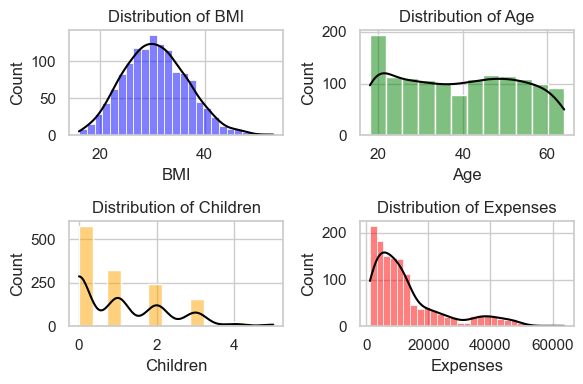

In [501]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))

# Looping through each variable
var_dict = {'BMI': 'blue', 'Age': 'green', 'Children': 'orange', 'Expenses':'red'}
row_col = [(0, 0), (0, 1), (1, 0),(1,1)]  # (row, col)

for i, (var, color) in enumerate(var_dict.items()):
    row, col = row_col[i]
    sns.histplot(data=insurance_data, x=var, kde=True, ax=axes[row, col], color=color)
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].lines[0].set_color('black')

plt.tight_layout()
plt.show()

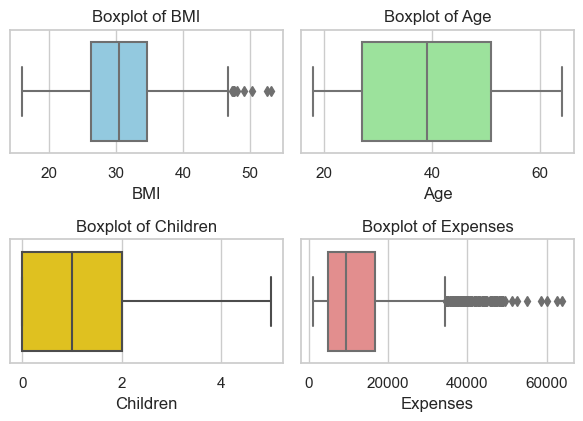

In [502]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Assuming insurance_data is your DataFrame
numerical_cols = ['BMI', 'Age', 'Children', 'Expenses']
num_plots = len(numerical_cols)
num_rows = (num_plots // 2) + 1
plt.figure(figsize=(6, 2 * num_rows))

# Define a color palette for the box plots
colors = ['skyblue', 'lightgreen', 'gold', 'lightcoral']

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=insurance_data[column], color=colors[i-1])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


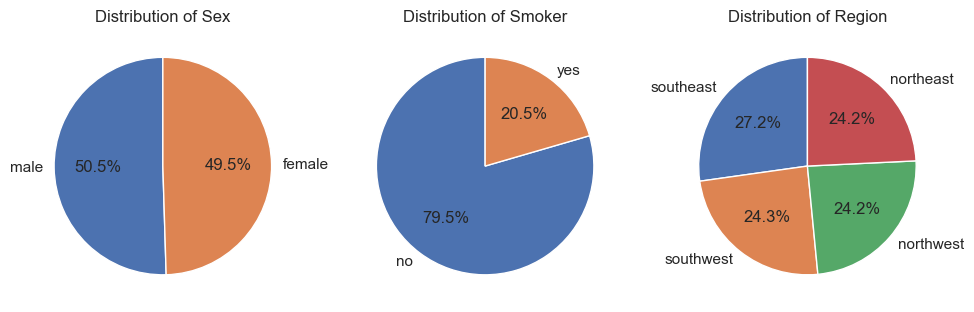

In [503]:
categorical_columns = ['Sex', 'Smoker','Region']

# Create subplots with 1 row and the number of columns based on the number of categorical columns
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(10, 4))

# Loop through each categorical column and create a pie chart
for i, column in enumerate(categorical_columns):
    counts = insurance_data[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

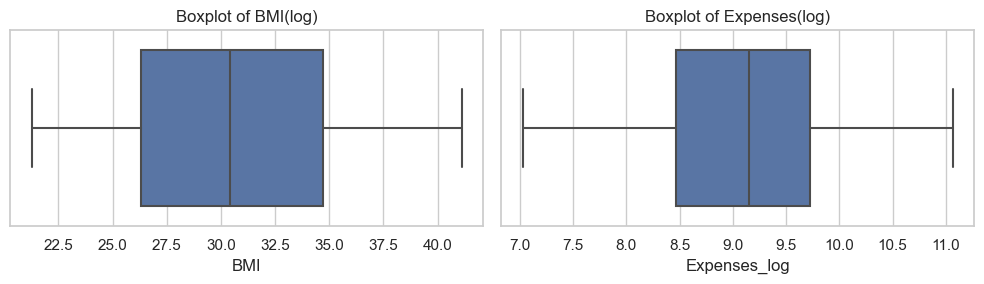

In [504]:
insurance_data['BMI'] = insurance_data['BMI'].clip(lower=insurance_data['BMI'].quantile(0.05), upper=insurance_data['BMI'].quantile(0.95))
insurance_data['Expenses_log'] = np.log1p(insurance_data['Expenses'])
insurance_data = insurance_data.drop(['Expenses'],axis=1)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=insurance_data['BMI'])
plt.title('Boxplot of BMI(log)')

plt.subplot(1, 2, 2)
sns.boxplot(x=insurance_data['Expenses_log'])
plt.title('Boxplot of Expenses(log)')

plt.tight_layout()
plt.show()

In [505]:
insurance_data['Smoker'] = insurance_data['Smoker'].map({'no': 0, 'yes': 1})
insurance_data.head()

,Age,Sex,BMI,Children,Smoker,Region,Expenses_log
0,19,female,27.9,0,1,southwest,9.734235
1,18,male,33.8,1,0,southeast,7.453880
2,28,male,33.0,3,0,southeast,8.400763
3,33,male,22.7,0,0,northwest,9.998137
4,32,male,28.9,0,0,northwest,8.260457


In [506]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Sex', 'Region']

label_encoder = LabelEncoder()
for column in categorical_columns:
    insurance_data[column + '_encoded'] = label_encoder.fit_transform(insurance_data[column])

# Display the DataFrame with label-encoded columns
columns_to_drop = ['Sex','Region']
insurance_data.drop(columns=columns_to_drop, inplace=True)
insurance_data.head()

,Age,BMI,Children,Smoker,Expenses_log,Sex_encoded,Region_encoded
0,19,27.9,0,1,9.734235,0,3
1,18,33.8,1,0,7.453880,1,2
2,28,33.0,3,0,8.400763,1,2
3,33,22.7,0,0,9.998137,1,1
4,32,28.9,0,0,8.260457,1,1


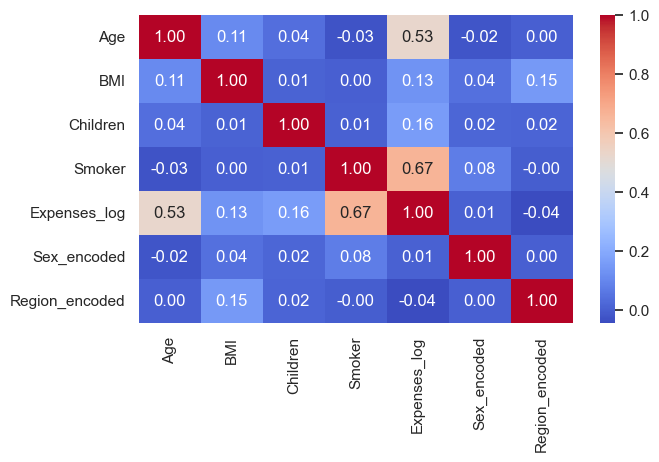

In [507]:
correlation_matrix =insurance_data.corr(numeric_only=True)
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

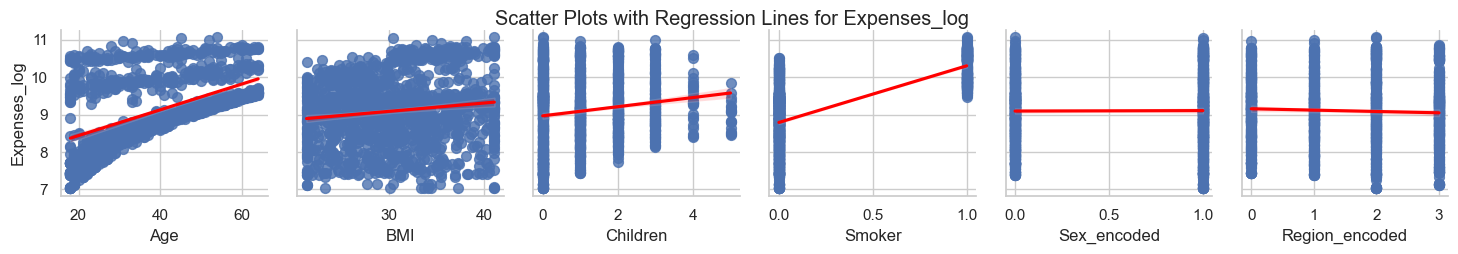

In [508]:
# Create a pair plot with regression lines
sns.set(style="whitegrid")

# Create a PairGrid
g = sns.PairGrid(insurance_data, y_vars=['Expenses_log'], x_vars=['Age', 'BMI', 'Children', 'Smoker', 'Sex_encoded', 'Region_encoded'])
g.map(sns.regplot, scatter_kws={'s': 50}, line_kws={'color': 'red'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})

# Adjust the layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots with Regression Lines for Expenses_log')

# Show the plots
plt.show()

In [509]:
X = insurance_data.drop(['Expenses_log'],axis=1)
y = insurance_data['Expenses_log']

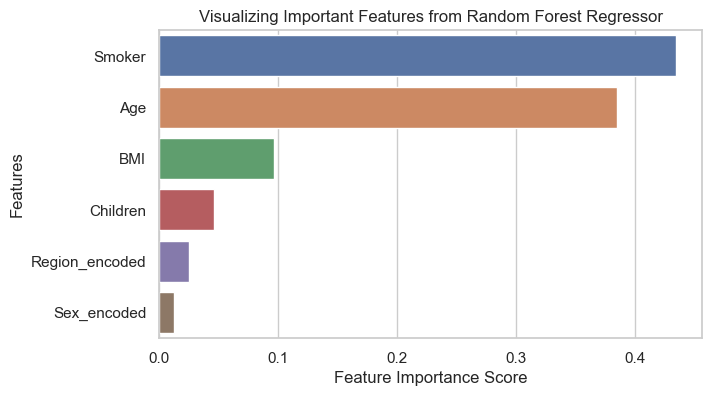

In [510]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
feature_imp1 = random_forest.feature_importances_

# Create a DataFrame to store feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_imp1})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the sorted feature importances
plt.figure(figsize=(7, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features from Random Forest Regressor")
plt.show();

In [511]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=42)
lr=LinearRegression()
gd=GradientBoostingRegressor()
rf=RandomForestRegressor()

In [512]:
def predictor(model_name):
    print("For {}".format(model_name))
    model_name.fit(xtrain,ytrain)
    y_pred_train = model_name.predict(xtrain)
    y_pred_test = model_name.predict(xtest)
    print("The TRAIN r2 score is",r2_score(ytrain,y_pred_train))
    mse = mean_squared_error(ytrain, y_pred_train)
    mae = mean_absolute_error(ytrain, y_pred_train)
    print("Mean Squared Error on Test Set:", mse)
    print("Mean Absolute Error on Test Set:", mae)
    print("The RMSE score for TRAIN data is",np.sqrt(mean_squared_error(ytrain,y_pred_train)))
    sns.kdeplot(ytrain, label='Actual Train')
    sns.kdeplot(y_pred_train,label='Predicted Train')
    plt.grid()
    plt.legend()
    plt.show()
    print("--"*50)
    print("The TEST r2 score is",r2_score(ytest,y_pred_test))
    mse = mean_squared_error(ytest, y_pred_test)
    mae = mean_absolute_error(ytest, y_pred_test)
    print("Mean Squared Error on Test Set:", mse)
    print("Mean Absolute Error on Test Set:", mae)
    print("The RMSE score for TEST data is",np.sqrt(mean_squared_error(ytest,y_pred_test)))
    sns.kdeplot(ytest, label='Actual Test')
    sns.kdeplot(y_pred_test, label='Predicted Test')
    plt.grid()
    plt.legend()
    plt.show()

For LinearRegression()
The TRAIN r2 score is 0.7561687872922918
Mean Squared Error on Test Set: 0.20167512989902645
Mean Absolute Error on Test Set: 0.2845654151470975
The RMSE score for TRAIN data is 0.4490825424117781


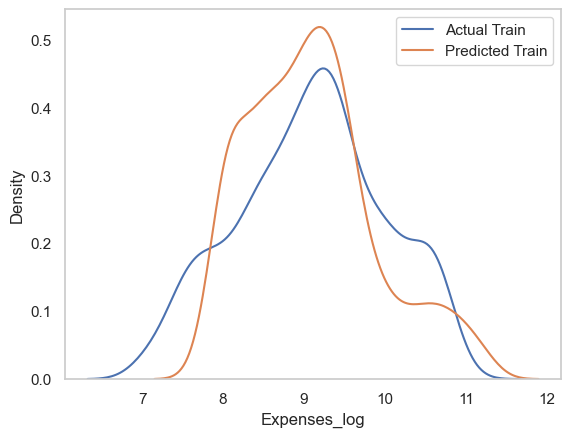

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.7893952463685556
Mean Squared Error on Test Set: 0.18525360907107435
Mean Absolute Error on Test Set: 0.26765946358444465
The RMSE score for TEST data is 0.4304109769407309


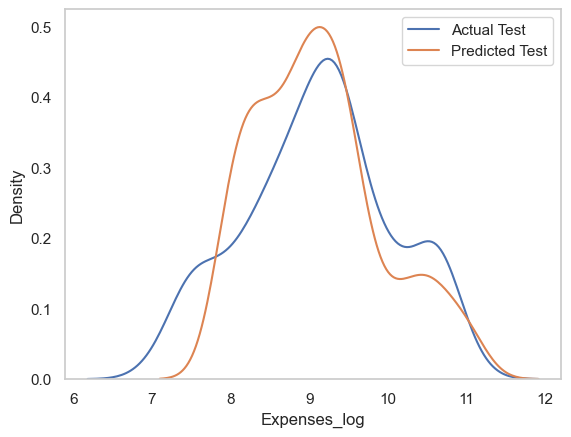

In [513]:
predictor(lr)

For GradientBoostingRegressor()
The TRAIN r2 score is 0.8893867283176795
Mean Squared Error on Test Set: 0.09148929576062875
Mean Absolute Error on Test Set: 0.15752045820967012
The RMSE score for TRAIN data is 0.3024719751656817


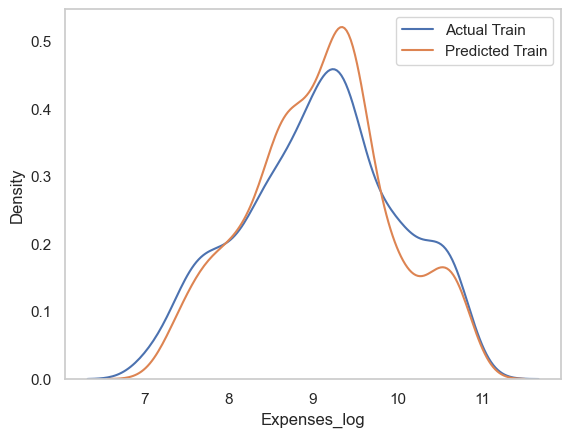

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.843689110252378
Mean Squared Error on Test Set: 0.13749526524711025
Mean Absolute Error on Test Set: 0.1898469503455259
The RMSE score for TEST data is 0.37080353996032756


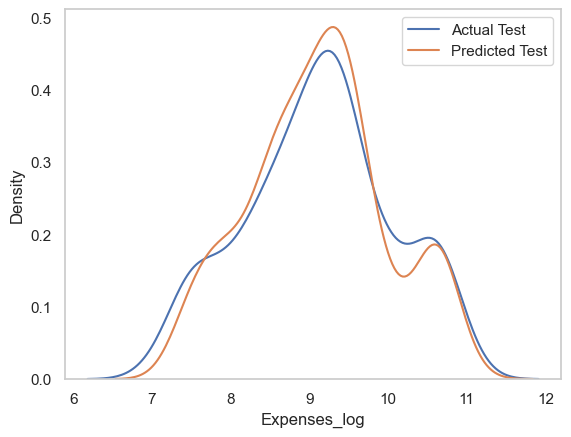

In [517]:
predictor(gd)

For RandomForestRegressor()
The TRAIN r2 score is 0.9718390858695243
Mean Squared Error on Test Set: 0.023292161623898116
Mean Absolute Error on Test Set: 0.07804578154049639
The RMSE score for TRAIN data is 0.15261769761039548


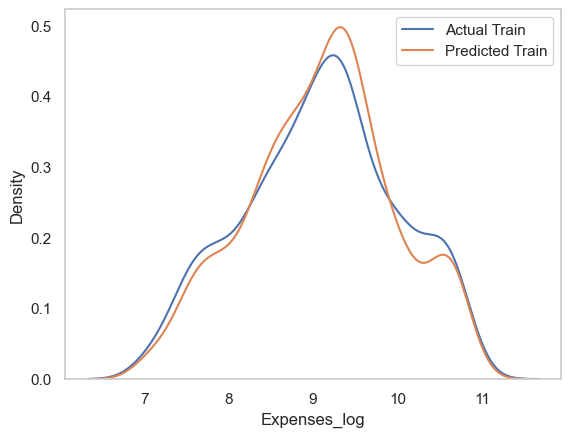

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.8214446862082707
Mean Squared Error on Test Set: 0.15706205927631683
Mean Absolute Error on Test Set: 0.19333890566313489
The RMSE score for TEST data is 0.3963105591279607


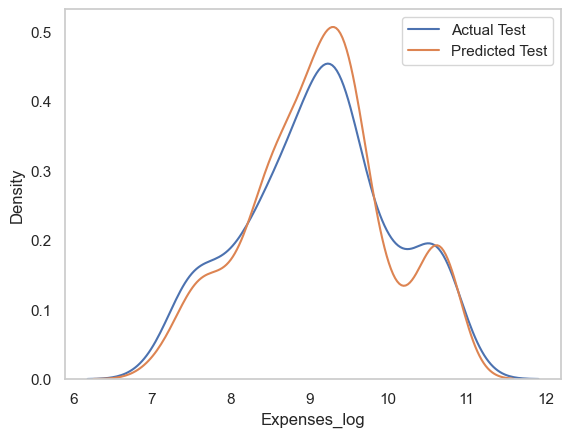

In [519]:
predictor(rf)

In [533]:
# Define the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_gb_model = grid_search.best_estimator_
y_pred_train = best_gb_model.predict(X_train)
y_pred = best_gb_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
print("Best Hyperparameters:")
print(best_gb_model)
print(f'R-squared train(R2): {r2_train}')
print(f'R-squared (R2): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print()

Best Hyperparameters:
GradientBoostingRegressor(min_samples_leaf=3, n_estimators=50)
R-squared train(R2): 0.8612374795392941
R-squared (R2): 0.8503789988691128
Mean Squared Error (MSE): 0.1316106591821284
Root Mean Squared Error (RMSE): 0.3627818341402011
Mean Absolute Error (MAE): 0.18678918325479166



In [537]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)
best_rf_model = grid_search.best_estimator_
y_val_pred = best_rf_model.predict(X_test)
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_test_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test_rf)
r2 = r2_score(y_test, y_pred_test_rf)
r2_train = r2_score(y_train, y_pred_train_rf)

print(f'R-squared train(R2): {r2_train}')
print(f'R-squared (R2): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
R-squared train(R2): 0.893913074318943
R-squared (R2): 0.845028750115273
Mean Squared Error (MSE): 0.13631688197143615
Root Mean Squared Error (RMSE): 0.36921116176442464
Mean Absolute Error (MAE): 0.18577790866889615


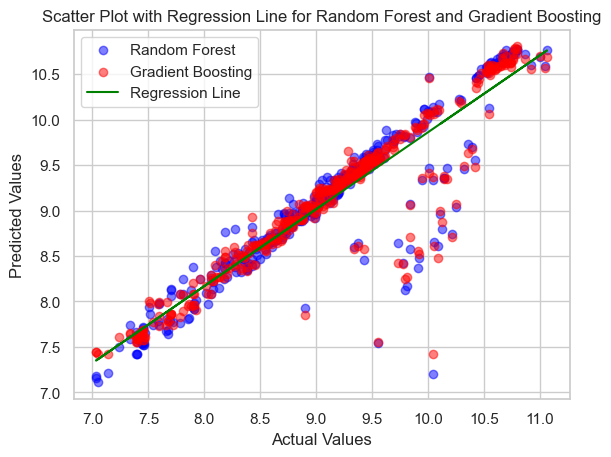

In [540]:
combined_y_test = np.concatenate([y_test, y_test])
combined_y_pred = np.concatenate([y_pred_test_rf, y_pred])

plt.scatter(y_test, y_pred_test_rf, color='blue', label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred, color='red', label='Gradient Boosting', alpha=0.5)

# Add a single regression line
z = np.polyfit(combined_y_test, combined_y_pred, 1)
p = np.poly1d(z)
plt.plot(combined_y_test, p(combined_y_test), color='green', label='Regression Line')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Scatter Plot with Regression Line for Random Forest and Gradient Boosting')

# Display the plot
plt.show()
